In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from kloppy import datasets
from kloppy.domain import EventType
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt


In [2]:
dataset = datasets.load('statsbomb')

/Users/koen/PycharmProjects/pydata-situsearch/.venv/lib/python3.7/site-packages/kloppy/infra/datasets/event/statsbomb.py:12: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  "\n\nYou are about to use StatsBomb public data."


In [5]:
home_team, away_team = dataset.metadata.teams


[Player(player_id='3109', team=Team(team_id='217', name='Barcelona', ground=<Ground.HOME: 'home'>, players=[...]), jersey_no=14, name='Malcom Filipe Silva de Oliveira', first_name=None, last_name=None, starting=False, position=None, attributes={}), Player(player_id='3501', team=Team(team_id='217', name='Barcelona', ground=<Ground.HOME: 'home'>, players=[...]), jersey_no=7, name='Philippe Coutinho Correia', first_name=None, last_name=None, starting=False, position=None, attributes={}), Player(player_id='5203', team=Team(team_id='217', name='Barcelona', ground=<Ground.HOME: 'home'>, players=[...]), jersey_no=5, name='Sergio Busquets i Burgos', first_name=None, last_name=None, starting=True, position=None, attributes={}), Player(player_id='5211', team=Team(team_id='217', name='Barcelona', ground=<Ground.HOME: 'home'>, players=[...]), jersey_no=18, name='Jordi Alba Ramos', first_name=None, last_name=None, starting=True, position=None, attributes={}), Player(player_id='5213', team=Team(team

In [6]:
def draw_player_heatmap(player):
    player_events = (
        dataset
        .filter(lambda event: event.event_type == EventType.PASS and event.player == player)
        .to_pandas()
    )

    pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
    fig, ax = pitch.draw()
    pitch.kdeplot(
        player_events["coordinates_x"],
        player_events["coordinates_y"],
        ax=ax,
        shade=True,
        n_levels=50,
    )
    plt.show()

Sergio Busquets i Burgos


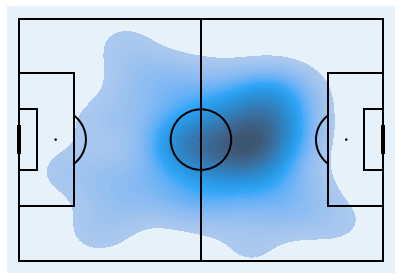

Jordi Alba Ramos


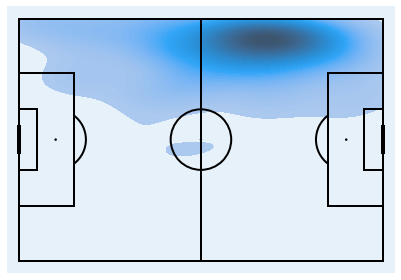

Gerard Piqué Bernabéu


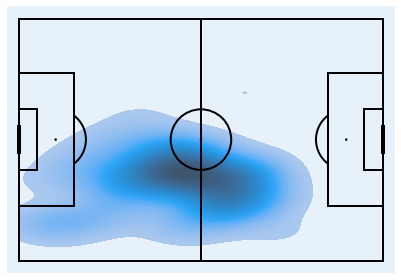

Luis Alberto Suárez Díaz


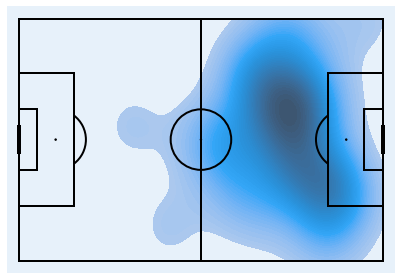

Ivan Rakitić


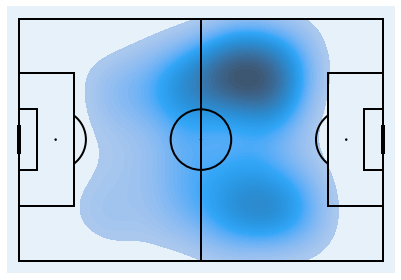

Ousmane Dembélé


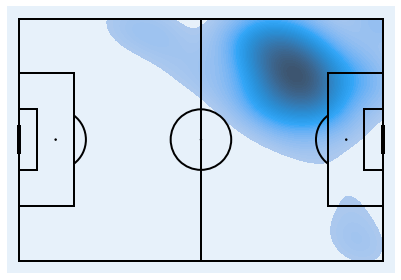

Samuel Yves Umtiti


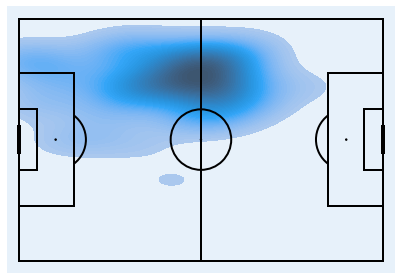

Lionel Andrés Messi Cuccittini


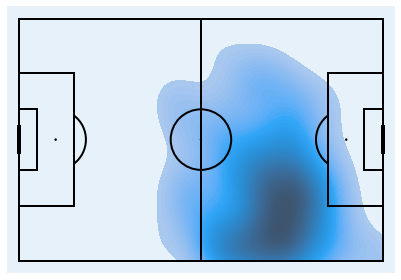

Nélson Cabral Semedo


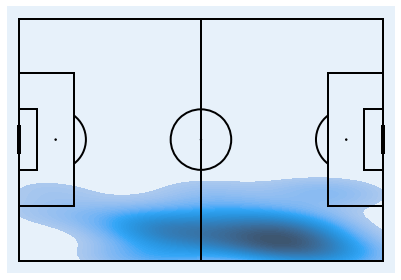

Sergi Roberto Carnicer


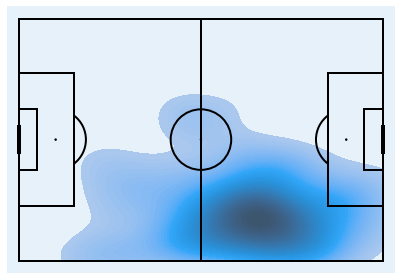

Marc-André ter Stegen


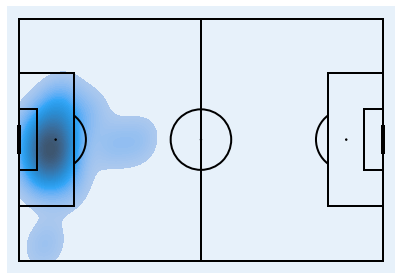

In [7]:
for player in home_team.players:
    if player.starting:
        print(player)
        draw_player_heatmap(player)